In [175]:
# from  lunarLanding import DQNAgent

%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Conv1D, MaxPooling1D, Flatten, Dropout, Activation
from keras.optimizers import Adam
from keras import backend as K
print(K.tensorflow_backend._get_available_gpus())

import pylab as pl
from IPython import display


import itertools
import gym

import numpy as np
from scipy.special import softmax
import random
from sklearn import preprocessing
import matplotlib.pyplot as plt
import time

import os

['/job:localhost/replica:0/task:0/device:GPU:0']


In [190]:
import random
import gym
import numpy as np
from collections import deque
from scipy.special import softmax
import random
from sklearn import preprocessing
import matplotlib.pyplot as plt
from keras.models import Sequential
import time

import os

# Deep Q-learning Agent
class DQNAgent:
    def __init__(self, state_size, action_size, memsize = 7000, ga = 0.95, explore_rate = 1, explore_decay = 0.995):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen = memsize)
        self.gamma = ga    # discount rate
        self.epsilon = explore_rate  # exploration rate
        self.epsilon_min = 0.1
        self.epsilon_decay = explore_decay
        self.target_model = Sequential()
        self.engine_model = Sequential()

    def remember(self, state, action, reward, next_state, done):
        if not done:
            self.memory.append((state, action, reward, next_state, done))
        
    def act(self, state):
                
        if np.random.rand() <= self.epsilon:
            chose = np.random.randint(0,4)
            return chose
        
        act_values = 0
        act_values = self.target_model.predict(state)
        chose = np.argmax(act_values)
        if chose == 0:
            return chose
        if chose == 1:
            return chose
        if chose == 2:
            return chose
        if chose == 3:
            return chose
        return act_values
#     def replay(self, batch_size):
#         minibatch = random.sample(self.memory, batch_size)
#         xs = []
#         ys = []

#         for state, action, reward, next_state, done in minibatch:
#             target = reward

#             if not done:
#                 target = reward + np.multiply (self.gamma , self.model.predict(next_state)[0] )
#             else:
#                 target = np.multiply (self.gamma , self.model.predict(next_state)[0] )
                
#             xs.append(state[0])
#             ys.append(target)
#         xs = np.array(xs)
#         ys = np.array(ys)
#         self.model.fit(xs, ys, epochs= 1, verbose=0 , batch_size=batch_size)
                
#         if self.epsilon > self.epsilon_min:
#             self.epsilon *= self.epsilon_decay
    
    def save_model(self, model_name = './checkpoint.h5', mem_name = 'memory'):
        self.target_model.save(model_name)

    def load_model(self,  model_name = './checkpoint.h5' , mem_name = 'memory.npy'):
        self.target_model.load_weights(model_name)
        self.engine_model.load_weights(model_name)
        self.memory = np.load(mem_name, allow_pickle=True)
        self.memory = deque(self.memory)
    def learn (self):
        
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay** 10
        output = list(itertools.islice(agent.memory, 0, None))
        xs = []
        ys = []
        for i in output:
            ys.append(i[3][0])
            xs.append(i[0][0])
        xs = np.array(xs)
        ys = np.array(ys)
        ys = reward/10 + np.multiply(self.gamma, self.engine_model.predict(ys)) 
        self.engine_model.fit(xs, ys, epochs = 2 , verbose = 0)
        del self.memory
        
        self.memory = deque(maxlen = 9000)
#         print(len(self.memory))
        self.engine_model.save_weights("checkpoint.h5")
        self.target_model.set_weights(self.engine_model.get_weights()) 

In [191]:
m = Sequential()
m.add(Dense(64, input_dim = 8))
m.add(Activation('relu'))
m.add(BatchNormalization())

m.add(Dense(64))
m.add(Activation('relu'))
m.add(BatchNormalization())

m.add(Dense(4))
m.add(Activation('softmax'))

m.compile(loss='categorical_crossentropy', optimizer=Adam())
m.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_141 (Dense)            (None, 64)                576       
_________________________________________________________________
activation_130 (Activation)  (None, 64)                0         
_________________________________________________________________
batch_normalization_113 (Bat (None, 64)                256       
_________________________________________________________________
dense_142 (Dense)            (None, 64)                4160      
_________________________________________________________________
activation_131 (Activation)  (None, 64)                0         
_________________________________________________________________
batch_normalization_114 (Bat (None, 64)                256       
_________________________________________________________________
dense_143 (Dense)            (None, 4)                 260       
__________

In [192]:
env = gym.make('LunarLander-v2')
state_size = 8
action_size = 4
agent = DQNAgent(state_size, action_size, memsize= 9000)

agent.target_model = m
agent.engine_model = m

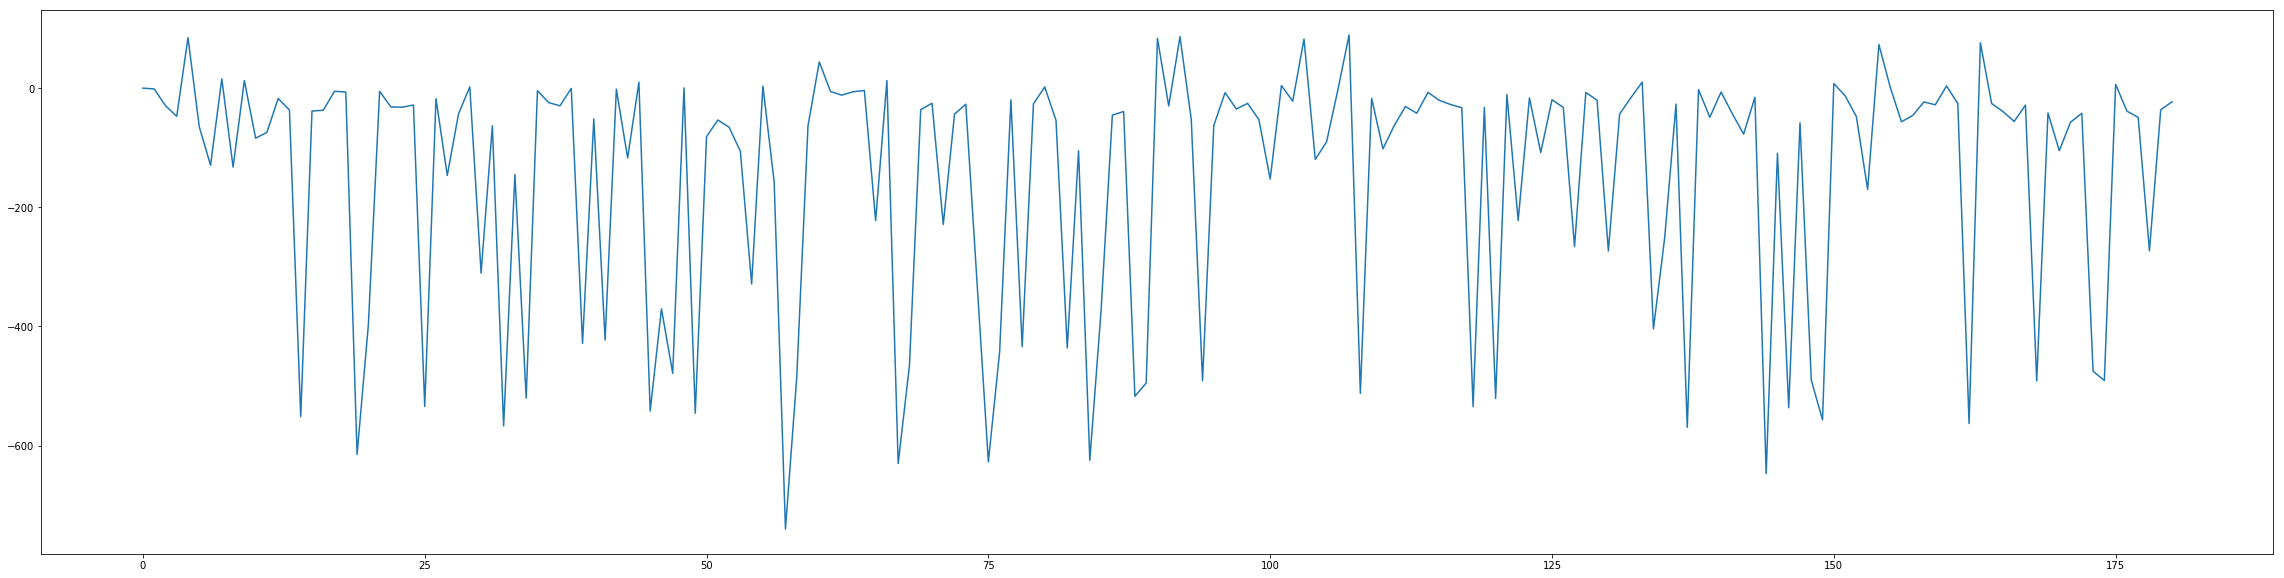

KeyboardInterrupt: 

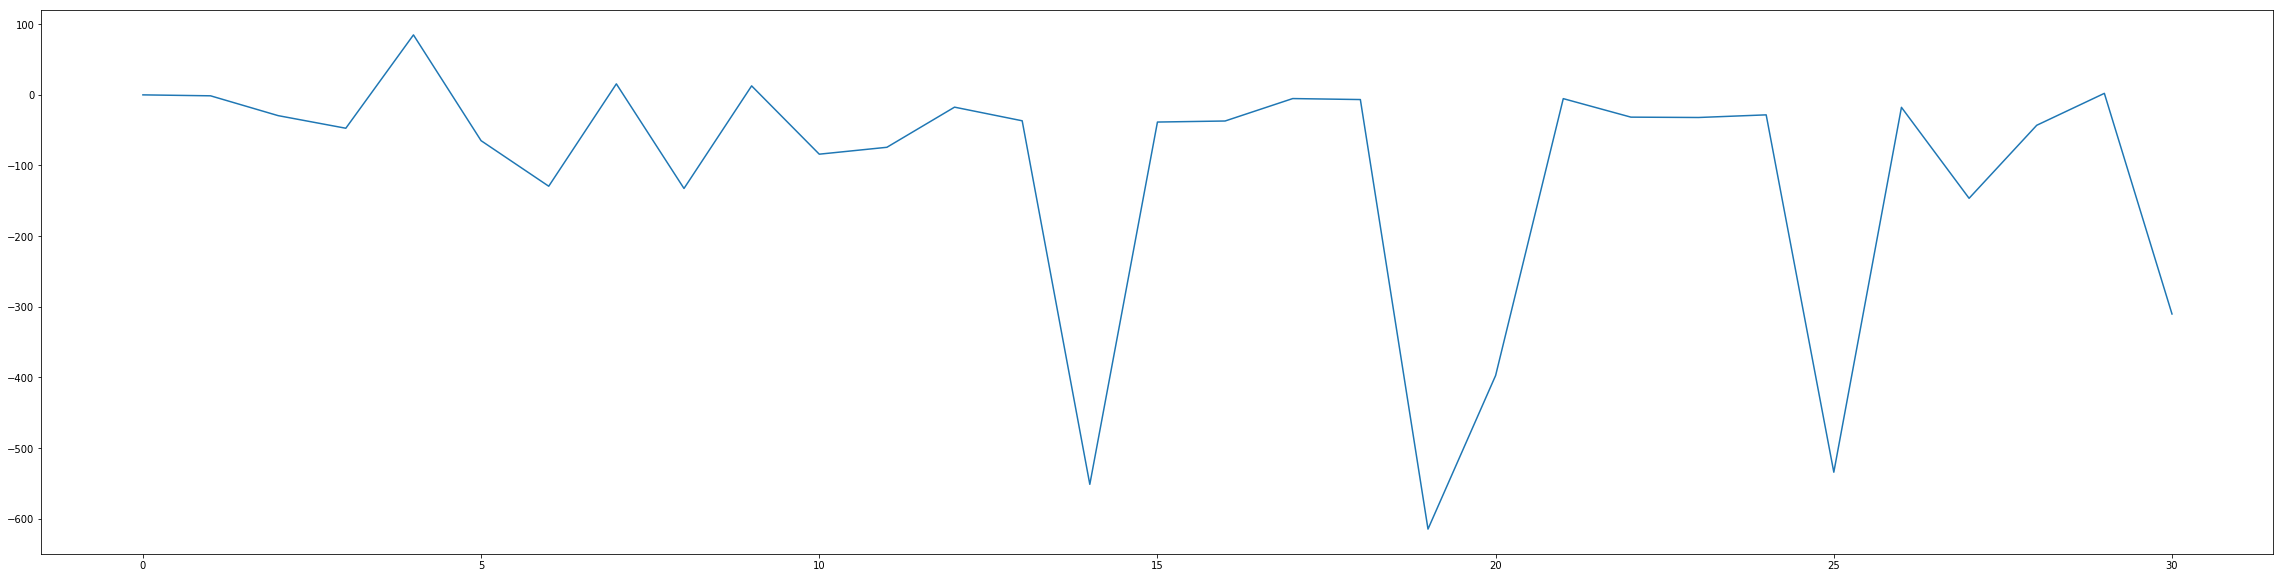

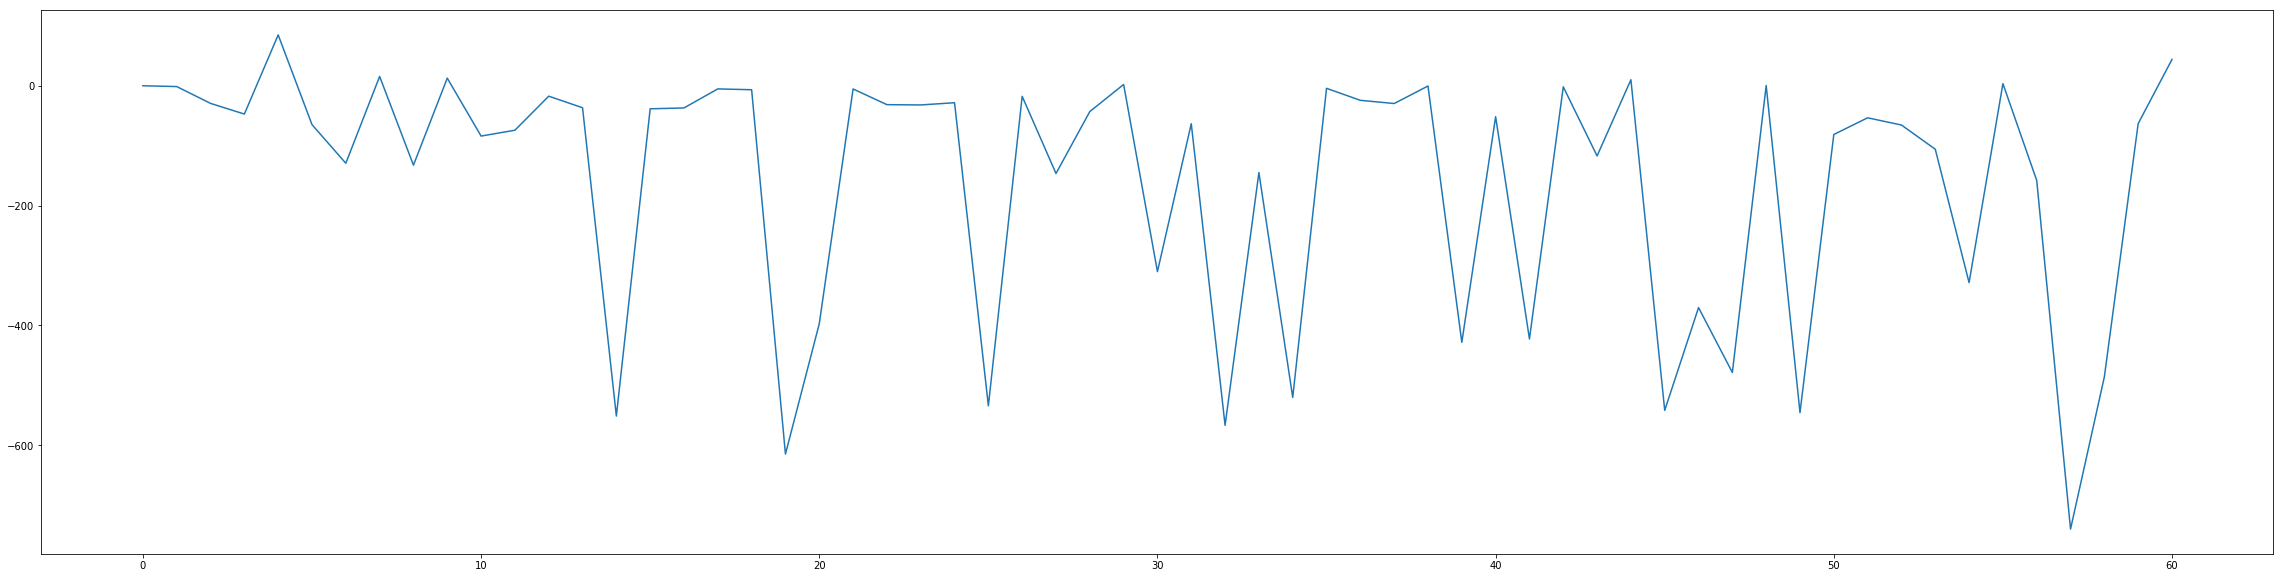

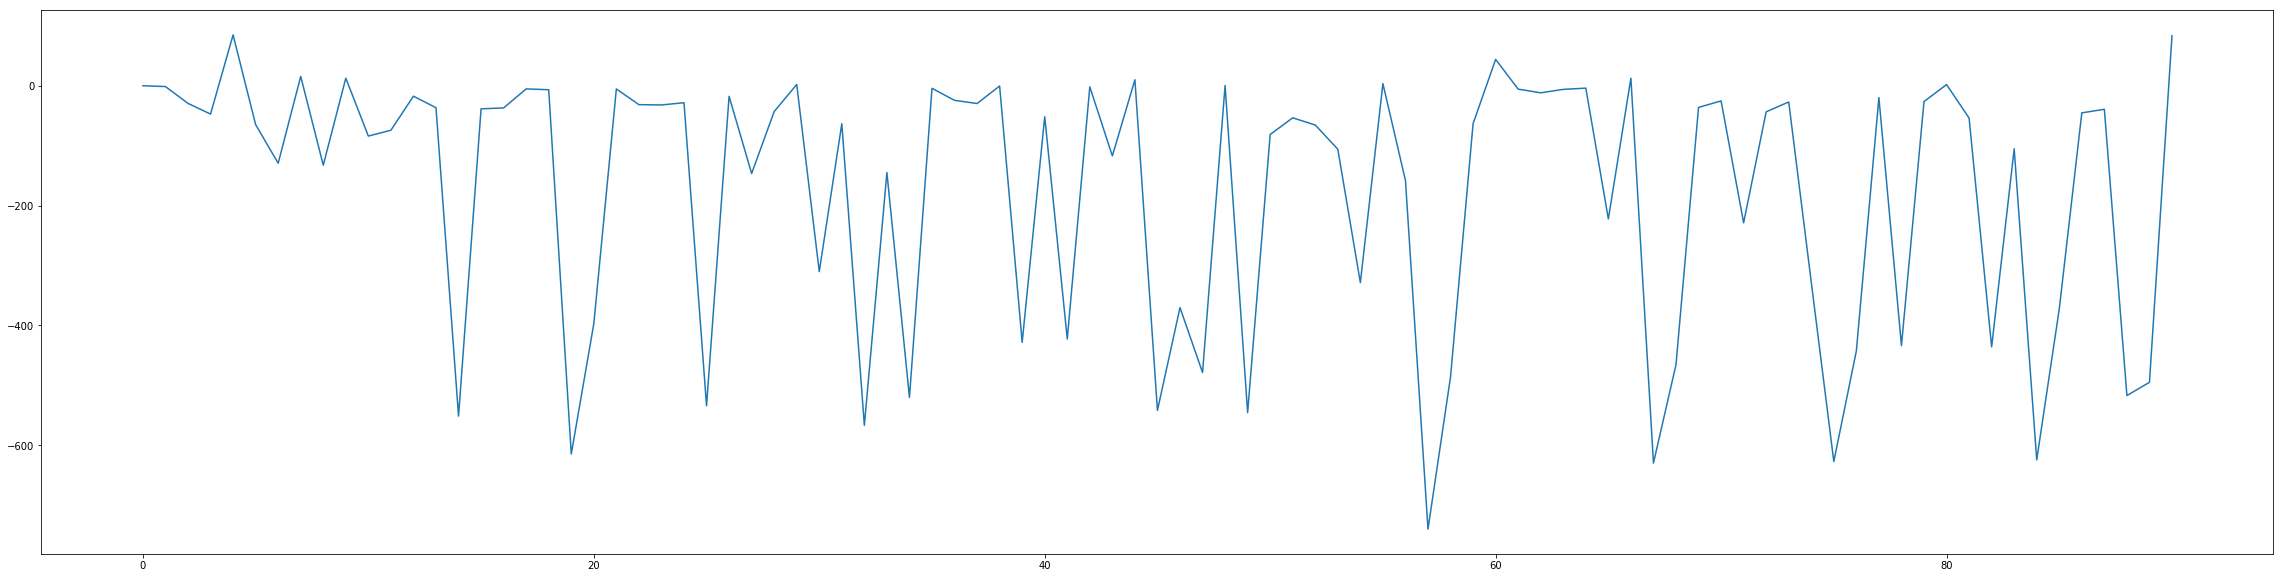

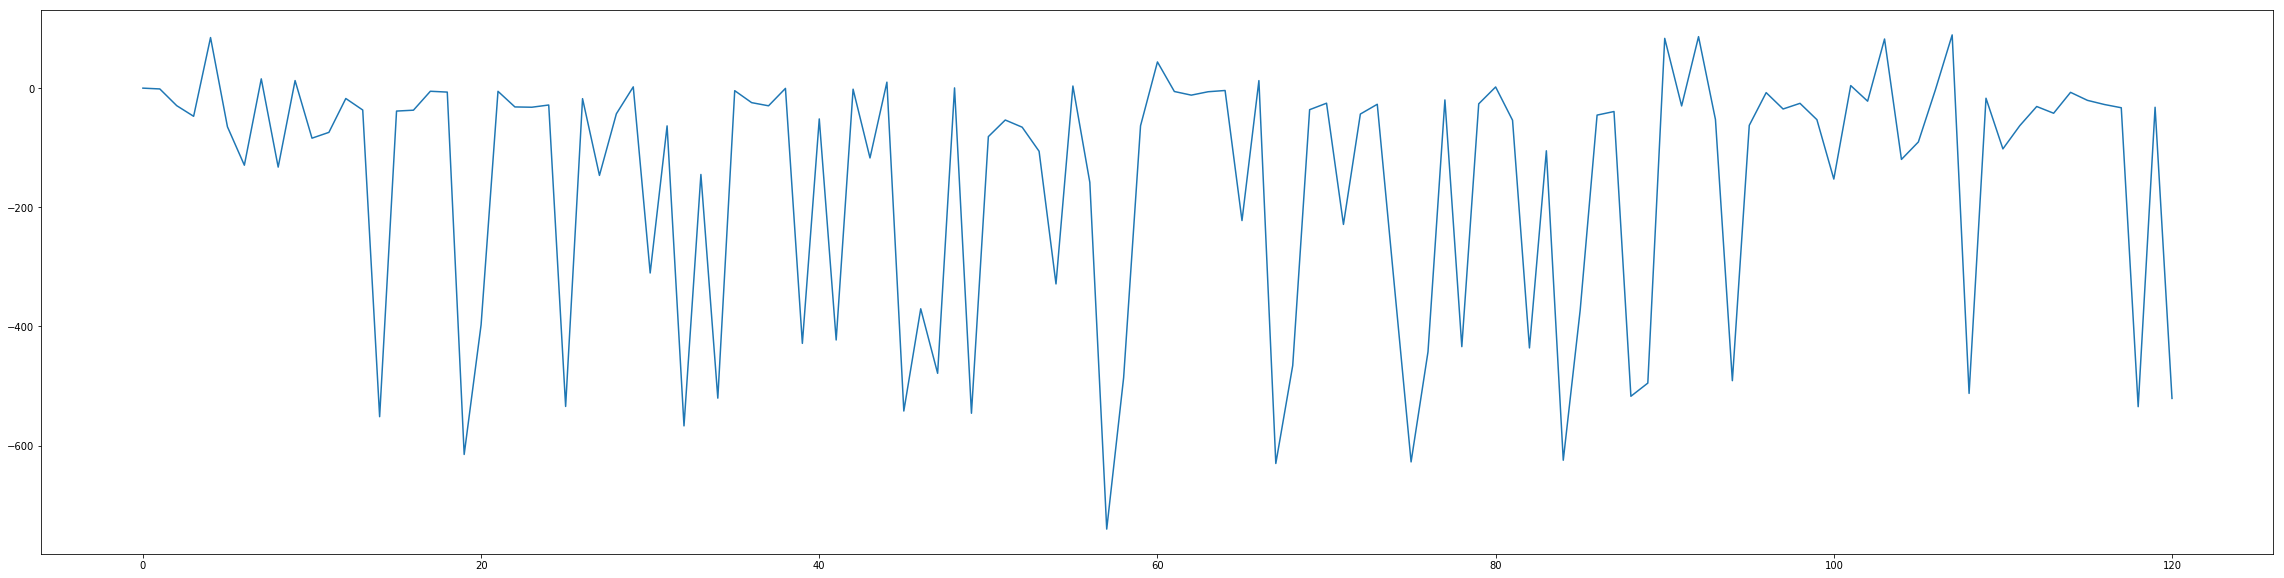

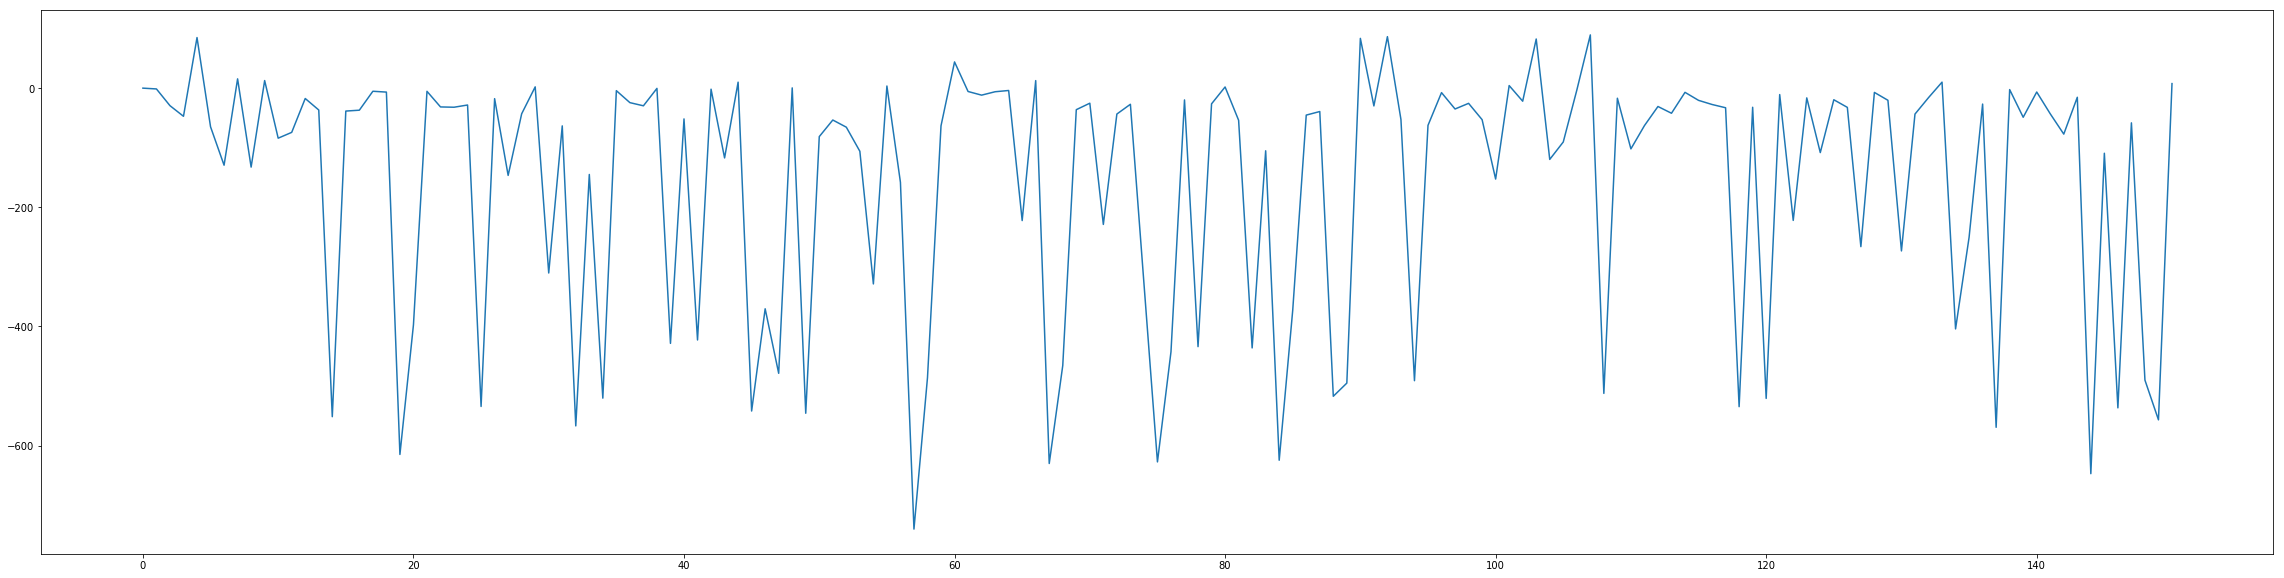

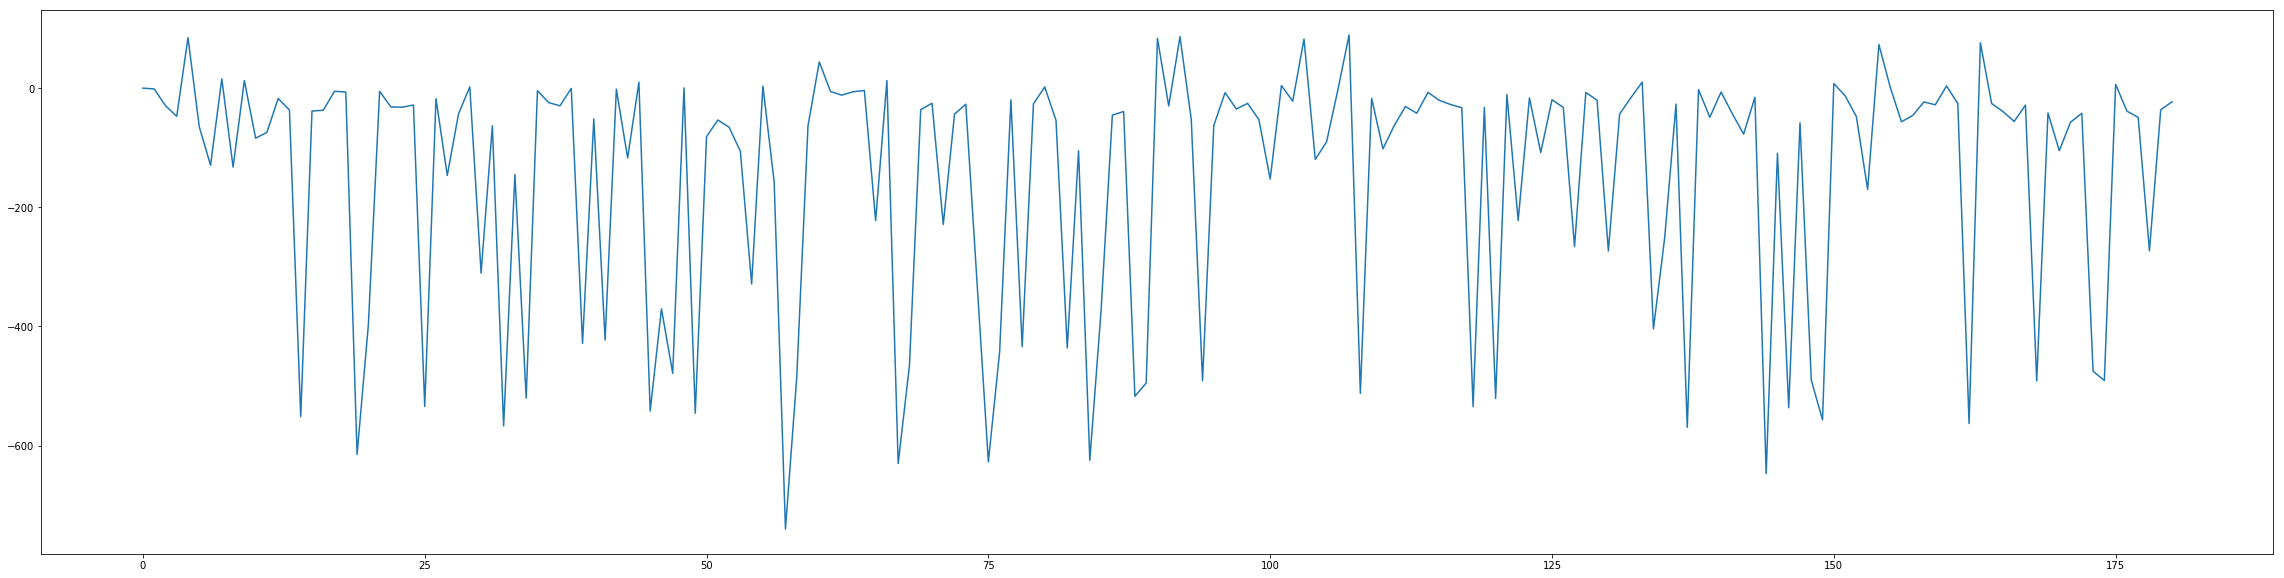

In [194]:
done = False
batch_size = 30
game_history = [0]


explore = True
t_steps = 0
for episode in range(3000):
    state = env.reset()
    state = np.reshape(state, [1, state_size])
    total_reward = 0
    start = time.time()
    for timee in range(450):

        action = agent.act(state)
        
        next_state, reward, done, _ = env.step(action)
        

        next_state = np.reshape(next_state, [1, state_size])

        agent.remember(state, action, reward, next_state, done)
        state = next_state
        
        if done:
            break
        
        total_reward += reward

    game_history.append(total_reward)
    
    if episode % 30 == 29:
#         print("epi:{} score: {} mean:{} spent:{}".format(episode, total_reward, np.mean(game_history[-30:]), time.time() - start))
        agent.learn()
        agent.save_model()
        np.save("game_history", game_history)
        pl.figure(figsize=(40,10))
        pl.plot(game_history)
        display.clear_output(wait=True)
        display.display(pl.gcf())
import time


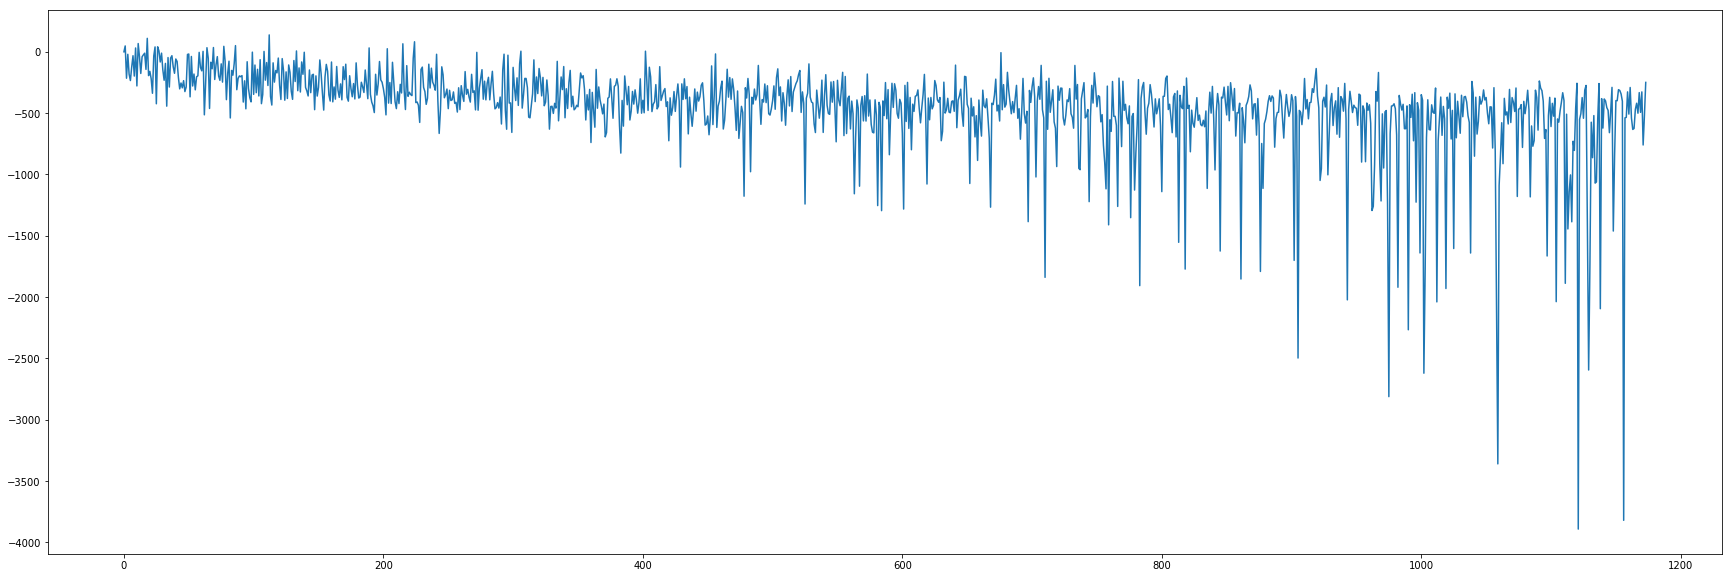

In [180]:
plt.figure(figsize=(30,10))
plt.plot(game_history)
plt.show()

In [163]:
np.mean(game_history[-100:])

-231.38370534667322

In [164]:
0.995**10

0.9511101304657719